### Rahul Krishna K 

### GRIP NOV 20  

### Stock Market Prediction using Numerical and Textual Analysis


## ------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation

import nltk 
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [16]:
df1 = pd.read_csv(r'D:\data set\india-news-headlines.csv')

In [3]:
df1.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [4]:
df2 = pd.read_csv(r'D:\data set\TLRY.csv')


In [46]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-16,18.500000,18.799999,18.110001,18.209999,18.209999,1790800
2019-12-17,18.299999,18.320000,17.770000,17.840000,17.840000,1989400
2019-12-18,17.799999,18.160000,17.160000,17.160000,17.160000,2464500
2019-12-19,17.200001,17.700001,16.920000,17.309999,17.309999,1847300
2019-12-20,17.250000,17.600000,17.110001,17.309999,17.309999,1926300


In [6]:
## check shape of both the dataset 
print(f'shape of headline dataset {df1.shape}')
print(f'shape of stock prize dataset {df2.shape}')

shape of headline dataset (3297172, 3)
shape of stock prize dataset (253, 7)


In [7]:
## Check for null values in the dataset
print(f'null values for df1 {df1.isna().any()}\n')
print(f'null values in price dataset{df2.isna().any()}')

null values for df1 publish_date         False
headline_category    False
headline_text        False
dtype: bool

null values in price datasetDate         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


In [8]:
df2 = df2.drop_duplicates()

## converting the date from object format to date time format
df2.Date = pd.to_datetime(df2.Date).dt.normalize()

In [9]:
df2.set_index('Date', inplace = True)


In [10]:
df2 = df2.sort_index(ascending=True)

df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-16,18.500000,18.799999,18.110001,18.209999,18.209999,1790800
2019-12-17,18.299999,18.320000,17.770000,17.840000,17.840000,1989400
2019-12-18,17.799999,18.160000,17.160000,17.160000,17.160000,2464500
2019-12-19,17.200001,17.700001,16.920000,17.309999,17.309999,1847300
2019-12-20,17.250000,17.600000,17.110001,17.309999,17.309999,1926300


In [17]:
df1 = df1.drop_duplicates()

df1.publish_date = df1.publish_date.astype(str)
df1.publish_date = df1.publish_date.apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:8])
df1.publish_date = pd.to_datetime(df1.publish_date).dt.normalize()

df1 = df1.drop('headline_category', axis = 1)

df1 = df1.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

df1.set_index('publish_date', inplace = True)

df1 = df1.sort_index(ascending = True, axis = 0)



In [32]:
df1.tail(10)

,headline_text
publish_date,
2020-06-21,Guest workers continue to throng Central rly s...
2020-06-22,infrared thermometer popular ones to measure b...
2020-06-23,Delayed periods? Time to accept that household...
2020-06-24,I never thought I had a voice until today: Vid...
2020-06-25,Truck firms look for new export markets to sel...
2020-06-26,Containment zone residents slam high prices ch...
2020-06-27,like me i wont let you have a toxic relationsh...
2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


### Creating a new DataFrame by concatinating two data sets i.e.. df1 and 2

In [22]:
stock_data = pd.concat([df1, df2], axis=1)

stock_data.dropna(axis = 0, inplace = True)

In [23]:
stock_data.head(10)

,headline_text,Open,High,Low,Close,Adj Close,Volume
2019-12-16,Villagers block train to protest prolonged clo...,18.500000,18.799999,18.110001,18.209999,18.209999,1790800.0
2019-12-17,After Jagannath Temple; Puri beach devpt plan ...,18.299999,18.320000,17.770000,17.840000,17.840000,1989400.0
2019-12-18,What is Citizenship (Amendment) Bill 2019: All...,17.799999,18.160000,17.160000,17.160000,17.160000,2464500.0
2019-12-19,Only 61% of CCA covered after revamp of canals...,17.200001,17.700001,16.920000,17.309999,17.309999,1847300.0
2019-12-20,I'm done playing the good girl; I want to be a...,17.250000,17.600000,17.110001,17.309999,17.309999,1926300.0
2019-12-23,Weekly Horoscope; December 22-28: Check predic...,17.299999,17.340000,16.940001,17.030001,17.030001,1622300.0
2019-12-24,Choker necklaces make for some sassy throwback...,17.010000,17.330000,16.820000,17.200001,17.200001,1018700.0
2019-12-26,NIT-T develops cold storage system for storing...,17.110001,17.200001,16.370001,16.549999,16.549999,2027400.0
2019-12-27,All schools in Naintial to be closed for two d...,16.510000,16.770000,16.260000,16.270000,16.270000,1880200.0
2019-12-30,Kareena Kapoor is holidaying in Switzerland an...,16.150000,16.240000,15.570000,15.720000,15.720000,2311900.0


In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
stock_data['negative'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
stock_data['neutral'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
stock_data['positive'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])

# displaying the stock data
stock_data.head()

,headline_text,Open,High,Low,Close,Adj Close,Volume,compound,negative,neutral,positive
2019-12-16,Villagers block train to protest prolonged clo...,18.500000,18.799999,18.110001,18.209999,18.209999,1790800.0,-0.9999,0.180,0.744,0.076
2019-12-17,After Jagannath Temple; Puri beach devpt plan ...,18.299999,18.320000,17.770000,17.840000,17.840000,1989400.0,-1.0000,0.178,0.748,0.074
2019-12-18,What is Citizenship (Amendment) Bill 2019: All...,17.799999,18.160000,17.160000,17.160000,17.160000,2464500.0,-0.9999,0.146,0.782,0.072
2019-12-19,Only 61% of CCA covered after revamp of canals...,17.200001,17.700001,16.920000,17.309999,17.309999,1847300.0,-0.9997,0.109,0.833,0.057
2019-12-20,I'm done playing the good girl; I want to be a...,17.250000,17.600000,17.110001,17.309999,17.309999,1926300.0,-0.9999,0.157,0.769,0.074


In [36]:
## Droping the text column since it is no longer required since we have obtained the sentiment scores
stock_data = stock_data.drop(['headline_text', 'Adj Close'], axis = 1)



In [37]:
stock_data.shape

(136, 9)

In [38]:
stock_data.describe()

,Open,High,Low,Close,Volume,compound,negative,neutral,positive
count,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000
mean,11.542500,12.111397,11.032794,11.482206,9.060810e+06,-0.999193,0.130529,0.791625,0.077846
std,5.193501,5.294440,5.085164,5.207570,9.769838e+06,0.002668,0.023977,0.027673,0.012498
min,2.600000,2.890000,2.430000,2.470000,1.018700e+06,-1.000000,0.076000,0.728000,0.046000
25%,7.495000,8.012500,7.042500,7.405000,3.128950e+06,-0.999900,0.113000,0.772000,0.070000
50%,9.630000,10.295000,8.990000,9.670000,6.477100e+06,-0.999700,0.130000,0.790000,0.078000
75%,17.000000,17.314999,16.277500,16.642500,1.086552e+07,-0.999400,0.145250,0.809500,0.087250
max,21.410000,22.950001,20.719999,21.360001,7.003920e+07,-0.970000,0.199000,0.867000,0.108000


### EDA of Stock data

Text(0, 0.5, 'Close Price ($)')

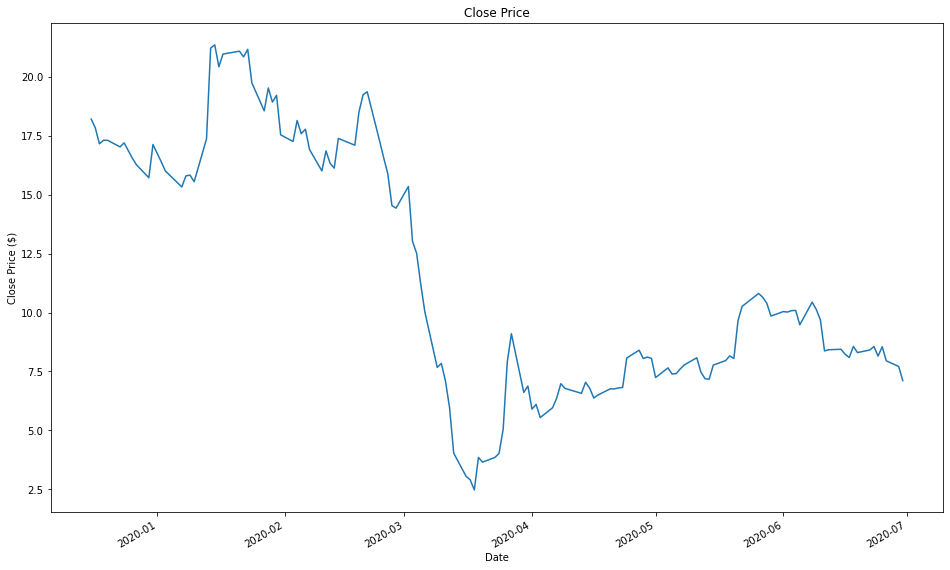

In [39]:
plt.figure(figsize=(16,10))

# plotting close price
stock_data['Close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

In [40]:
# calculating 7 day rolling mean
stock_data.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,compound,negative,neutral,positive
2019-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,17.622857,17.892857,17.261429,17.437143,1.808471e+06,-0.999857,0.149429,0.776571,0.073714
2019-12-26,17.424286,17.664286,17.012858,17.200000,1.842271e+06,-0.999857,0.144429,0.781143,0.074143
2019-12-27,17.168571,17.442857,16.797143,16.975714,1.826671e+06,-0.999843,0.143714,0.782286,0.073714
2019-12-30,16.932857,17.168572,16.570000,16.770000,1.804871e+06,-0.999843,0.147286,0.778429,0.074143


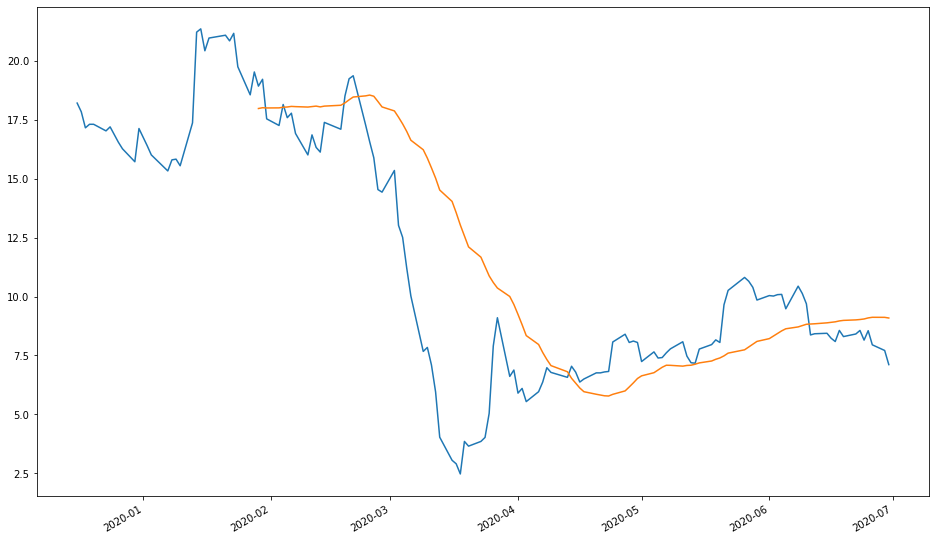

In [41]:

# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
stock_data['Close'].plot()
stock_data.rolling(window=30).mean()['Close'].plot()

In [42]:
stock_data

,Open,High,Low,Close,Volume,compound,negative,neutral,positive
2019-12-16,18.500000,18.799999,18.110001,18.209999,1790800.0,-0.9999,0.180,0.744,0.076
2019-12-17,18.299999,18.320000,17.770000,17.840000,1989400.0,-1.0000,0.178,0.748,0.074
2019-12-18,17.799999,18.160000,17.160000,17.160000,2464500.0,-0.9999,0.146,0.782,0.072
2019-12-19,17.200001,17.700001,16.920000,17.309999,1847300.0,-0.9997,0.109,0.833,0.057
2019-12-20,17.250000,17.600000,17.110001,17.309999,1926300.0,-0.9999,0.157,0.769,0.074
...,...,...,...,...,...,...,...,...,...
2020-06-24,8.490000,8.600000,8.060000,8.150000,4221600.0,-0.9997,0.116,0.808,0.075
2020-06-25,8.050000,8.650000,8.000000,8.550000,7755600.0,-0.9999,0.130,0.815,0.055
2020-06-26,8.310000,8.430000,7.770000,7.950000,6340900.0,-0.9999,0.150,0.765,0.085
2020-06-29,7.960000,8.020000,7.560000,7.710000,3892700.0,-0.9997,0.121,0.800,0.079


In [44]:
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 108
Number of records in Test Data: 28


In [48]:
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close
compound = stock_data.iloc[start:total_data,1] #compound
negative = stock_data.iloc[start:total_data,2] #neg
neutral = stock_data.iloc[start:total_data,3] #neu
positive = stock_data.iloc[start:total_data,4] #pos
open_price = stock_data.iloc[start:total_data,5] #open
high = stock_data.iloc[start:total_data,6] #high
low = stock_data.iloc[start:total_data,7] #low
volume = stock_data.iloc[start:total_data,8] #volume

# printing close price
print("Close Price:")
close_price

Close Price:


2019-12-17    18.299999
2019-12-18    17.799999
2019-12-19    17.200001
2019-12-20    17.250000
2019-12-23    17.299999
                ...    
2020-06-24     8.490000
2020-06-25     8.050000
2020-06-26     8.310000
2020-06-29     7.960000
2020-06-30     7.740000
Name: Open, Length: 135, dtype: float64

In [49]:
close_price_shifted = close_price.shift(-1) 

# shifting next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
2019-12-17,18.299999,17.799999,18.320000,18.160000,0.074,-1.0000,0.178,0.748
2019-12-18,17.799999,17.200001,18.160000,17.700001,0.072,-0.9999,0.146,0.782
2019-12-19,17.200001,17.250000,17.700001,17.600000,0.057,-0.9997,0.109,0.833
2019-12-20,17.250000,17.299999,17.600000,17.340000,0.074,-0.9999,0.157,0.769
2019-12-23,17.299999,17.010000,17.340000,17.330000,0.081,-0.9997,0.130,0.788
2019-12-24,17.010000,17.110001,17.330000,17.200001,0.082,-0.9999,0.146,0.772
2019-12-26,17.110001,16.510000,17.200001,16.770000,0.079,-0.9999,0.145,0.776
2019-12-27,16.510000,16.150000,16.770000,16.240000,0.071,-0.9999,0.173,0.756
2019-12-30,16.150000,15.630000,16.240000,17.780001,0.075,-0.9999,0.171,0.755
2019-12-31,15.630000,17.629999,17.780001,17.700001,0.082,-0.9999,0.157,0.761


In [50]:
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
2019-12-17,18.299999,18.320000,18.160000,0.074,-1.0000,0.178,0.748
2019-12-18,17.799999,18.160000,17.700001,0.072,-0.9999,0.146,0.782
2019-12-19,17.200001,17.700001,17.600000,0.057,-0.9997,0.109,0.833
2019-12-20,17.250000,17.600000,17.340000,0.074,-0.9999,0.157,0.769
2019-12-23,17.299999,17.340000,17.330000,0.081,-0.9997,0.130,0.788
...,...,...,...,...,...,...,...
2020-06-23,8.310000,9.200000,8.600000,0.073,-0.9999,0.141,0.787
2020-06-24,8.490000,8.600000,8.650000,0.075,-0.9997,0.116,0.808
2020-06-25,8.050000,8.650000,8.430000,0.055,-0.9999,0.130,0.815
2020-06-26,8.310000,8.430000,8.020000,0.085,-0.9999,0.150,0.765


In [54]:
y = data['close_price_shifted']
y

2019-12-17    17.799999
2019-12-18    17.200001
2019-12-19    17.250000
2019-12-20    17.299999
2019-12-23    17.010000
                ...    
2020-06-23     8.490000
2020-06-24     8.050000
2020-06-25     8.310000
2020-06-26     7.960000
2020-06-29     7.740000
Name: close_price_shifted, Length: 134, dtype: float64

In [55]:
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array(y).reshape((len( y), 1))
y = scaler_y.fit_transform(y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 0.66932472,  0.53838477,  0.52243263, -0.09677419, -1.        ,
          0.65853659, -0.71223022],
        [ 0.61616151,  0.52243263,  0.47657032, -0.16129032, -0.99333333,
          0.13821138, -0.22302158],
        [ 0.55236587,  0.47657032,  0.46660013, -0.64516129, -0.98      ,
         -0.46341463,  0.51079137],
        [ 0.55768208,  0.46660013,  0.44067789, -0.09677419, -0.99333333,
          0.31707317, -0.41007194],
        [ 0.5629983 ,  0.44067789,  0.43968089,  0.12903226, -0.98      ,
         -0.12195122, -0.13669065],
        [ 0.53216374,  0.43968089,  0.42671987,  0.16129032, -0.99333333,
          0.13821138, -0.36690647],
        [ 0.54279649,  0.42671987,  0.38384839,  0.06451613, -0.99333333,
          0.12195122, -0.30935252],
        [ 0.47900053,  0.38384839,  0.33100691, -0.19354839, -0.99333333,
          0.57723577, -0.5971223 ],
        [ 0.44072302,  0.33100691,  0.48454639, -0.06451613, -0.99333333,
          0.54471545, -0.61151079],
        [ 

### Dividing the dataset into Training and Test

In [56]:
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (108, 7) and y: (108, 1)
Number of rows and columns in the Test set X: (25, 7) and y: (25, 1)


In [57]:
## reshape dataset

X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (108, 7, 1)
Shape of Test set X: (25, 7, 1)


In [58]:
np.random.seed(47)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 100)            40800     
_________________________________________________________________
dropout (Dropout)            (None, 7, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 100)            80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [59]:
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
11/11 [==============================] - 2s 170ms/step - loss: 0.2161 - val_loss: 0.0117
Epoch 2/10
11/11 [==============================] - 0s 21ms/step - loss: 0.0393 - val_loss: 0.0126
Epoch 3/10
11/11 [==============================] - 0s 20ms/step - loss: 0.0262 - val_loss: 0.0155
Epoch 4/10
11/11 [==============================] - 0s 20ms/step - loss: 0.0253 - val_loss: 0.0089
Epoch 5/10
11/11 [==============================] - 0s 16ms/step - loss: 0.0199 - val_loss: 0.0091
Epoch 6/10
11/11 [==============================] - 0s 15ms/step - loss: 0.0183 - val_loss: 0.0111
Epoch 7/10
11/11 [==============================] - 0s 20ms/step - loss: 0.0158 - val_loss: 0.0086
Epoch 8/10
11/11 [==============================] - 0s 19ms/step - loss: 0.0121 - val_loss: 0.0127
Epoch 9/10
11/11 [==============================] - 0s 16ms/step - loss: 0.0127 - val_loss: 0.0075
Epoch 10/10
11/11 [==============================] - 0s 14ms/step - loss: 0.0114 - val_loss: 0.0116


In [60]:
### Model evaluation
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

25/25 [==============================] - 0s 4ms/step - loss: 0.0096
Train Loss = 0.0112
Test Loss = 0.0096


### Prediction

In [61]:
predictions = model.predict(X_test) 

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:5]

Predictions:


array([[10.144796],
       [10.752358],
       [ 9.876665],
       [ 9.875426],
       [ 9.345276]], dtype=float32)

In [62]:
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

### Ploting it with test dataset

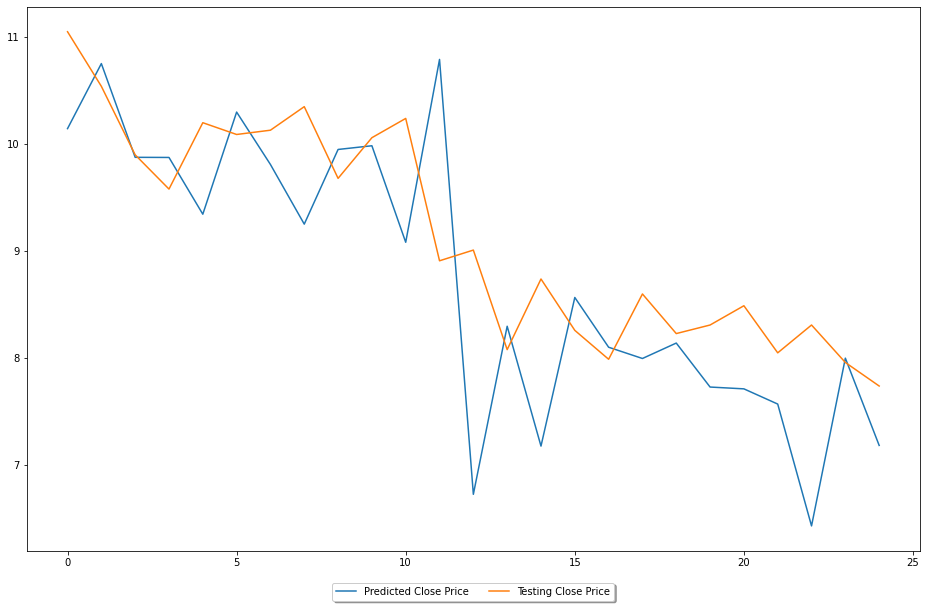

In [63]:
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()

In [ ]:
ṅ